In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# this dataset is so complicated, for the first time we just try to read only single person data 
data = pd.read_pickle("/Users/Junhui/Desktop/ESILV_5A/Python for Data Analysis/PPG_FieldStudy/S1/S1.pkl")

In [3]:
# ‘data’ -> ‘label’ includes the heart rate ground truth for the 8-secondsegments, shifted with 2-seconds 
# ‘data’ -> ‘signal’ -> ‘wrist’ -> ‘BVP’ includes the PPG-signal. The sampling rate is 64 Hz.
# ‘data’ -> ‘signal’ -> ‘wrist’ -> ‘ACC’ includes the ACC-signal. The sampling rate is 32 Hz. 
data

{'rpeaks': array([    240,    1174,    2128, ..., 6447292, 6447748, 6448224],
       dtype=int32),
 'signal': {'chest': {'ACC': array([[ 0.85640001, -0.06779999, -0.36559999],
          [ 0.8556    , -0.06900001, -0.3646    ],
          [ 0.852     , -0.07020003, -0.3642    ],
          ...,
          [ 0.88759995, -0.1038    , -0.27920002],
          [ 0.88619995, -0.10159999, -0.27819997],
          [ 0.88680005, -0.10140002, -0.27380002]]),
   'ECG': array([[0.01560974],
          [0.01812744],
          [0.01753235],
          ...,
          [0.21368408],
          [0.21556091],
          [0.21702576]]),
   'EMG': array([[-1.5],
          [-1.5],
          [-1.5],
          ...,
          [-1.5],
          [-1.5],
          [-1.5]]),
   'EDA': array([[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]),
   'Temp': array([[-273.15],
          [-273.15],
          [-273.15],
          ...,
          [-273.15],
          [-273.15],
    

In [4]:
data.keys()

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

In [5]:
print(len(data['rpeaks']),len(data['signal']),len(data['label']),len(data['activity']))

11431 2 4603 36848


In [6]:
signal = data['signal']

In [7]:
signal['chest']

{'ACC': array([[ 0.85640001, -0.06779999, -0.36559999],
        [ 0.8556    , -0.06900001, -0.3646    ],
        [ 0.852     , -0.07020003, -0.3642    ],
        ...,
        [ 0.88759995, -0.1038    , -0.27920002],
        [ 0.88619995, -0.10159999, -0.27819997],
        [ 0.88680005, -0.10140002, -0.27380002]]), 'ECG': array([[0.01560974],
        [0.01812744],
        [0.01753235],
        ...,
        [0.21368408],
        [0.21556091],
        [0.21702576]]), 'EMG': array([[-1.5],
        [-1.5],
        [-1.5],
        ...,
        [-1.5],
        [-1.5],
        [-1.5]]), 'EDA': array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]), 'Temp': array([[-273.15],
        [-273.15],
        [-273.15],
        ...,
        [-273.15],
        [-273.15],
        [-273.15]], dtype=float32), 'Resp': array([[ 4.4418335 ],
        [ 4.45098877],
        [ 4.47387695],
        ...,
        [-3.05023193],
        [-3.05328369],
        [-3.05633545]])

In [8]:
len(signal['chest'])

6

In [9]:
pd.DataFrame(data["signal"])

,chest,wrist
ACC,"[[0.8564000129699707, -0.06779998540878296, -0...","[[-0.765625, -0.078125, 0.671875], [-0.765625,..."
BVP,NaN,"[[7.28], [6.33], [5.46], [4.6], [3.74], [2.86]..."
ECG,"[[0.015609741210937498], [0.01812744140625], [...",NaN
EDA,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[4.722437], [4.728843], [4.718594], [4.717312..."
EMG,"[[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...",NaN
Resp,"[[4.44183349609375], [4.45098876953125], [4.47...",NaN
TEMP,NaN,"[[32.13], [32.16], [32.16], [32.16], [32.16], ..."
Temp,"[[-273.15], [-273.15], [-273.15], [-273.15], [...",NaN


In [10]:
# we can find that different measurement data for different parts

''' 
We should combien two different type of data 
Since the measured frequencies are different, we first need to unify the frequencies 
But what is our benchmark? We use the number of prediction as a benchmark.
len(data['activity']) = 36848
'''


" \nWe should combien two different type of data \nSince the measured frequencies are different, we first need to unify the frequencies \nBut what is our benchmark? We use the number of prediction as a benchmark.\nlen(data['activity']) = 36848\n"

In [11]:
for i in signal['chest'].values():
    print(len(i))

print('--------')
for i in signal['wrist'].values():
    print(len(i))    
    

6448400
6448400
6448400
6448400
6448400
6448400
--------
294784
589568
36848
36848


In [12]:
chest_ACC = signal['chest']['ACC']
chest_ACC 
#ACC.csv: sampled at 32 Hz. The 3 data columns refer to the 3 accelerometer channels. 

array([[ 0.85640001, -0.06779999, -0.36559999],
       [ 0.8556    , -0.06900001, -0.3646    ],
       [ 0.852     , -0.07020003, -0.3642    ],
       ...,
       [ 0.88759995, -0.1038    , -0.27920002],
       [ 0.88619995, -0.10159999, -0.27819997],
       [ 0.88680005, -0.10140002, -0.27380002]])

In [13]:
len(chest_ACC)

6448400

In [14]:
'''
len(chest_ACC)/len(data['activity'])  -> 175.0 
The data of the chest are all the same data length 6448400  y = 36848
So every 175 data needs to be averaged to balance the predicted values

But chest_ACC has 3 data for every single data 
so we need to divide the data into three separate data during preprocessing
'''

"\nlen(chest_ACC)/len(data['activity'])  -> 175.0 \nThe data of the chest are all the same data length 6448400  y = 36848\nSo every 175 data needs to be averaged to balance the predicted values\n\nBut chest_ACC has 3 data for every single data \nso we need to divide the data into three separate data during preprocessing\n"

In [15]:
#chest_ACC[0]

In [16]:
chest_ACC_0 = [i[0] for i in chest_ACC ]
chest_ACC_1 = [i[1] for i in chest_ACC ]
chest_ACC_2 = [i[2] for i in chest_ACC ]

In [17]:
from statistics import mean 

chest_ACC_0_mean = [mean(chest_ACC_0[x:x+175]) for x in range(0,len(chest_ACC_0),175)]
chest_ACC_1_mean = [mean(chest_ACC_1[x:x+175]) for x in range(0,len(chest_ACC_1),175)]
chest_ACC_2_mean = [mean(chest_ACC_2[x:x+175]) for x in range(0,len(chest_ACC_2),175)]

In [18]:
chest_ACC_0_mean

[0.8521565743855067,
 0.8512617124829973,
 0.8515702833448138,
 0.8521417147772653,
 0.8519577162606375,
 0.8534537179129464,
 0.848445713860648,
 0.8488491439819336,
 0.8477302857807705,
 0.848426284790039,
 0.8513051407677786,
 0.8500457150595528,
 0.8528388575145176,
 0.8500285700389317,
 0.8483828578676497,
 0.8755222851889474,
 0.8653497178213937,
 0.8601622888020106,
 0.8399622821807862,
 0.8962582847050258,
 0.875750857761928,
 0.8610274301256452,
 0.8361782918657575,
 0.8623268563406808,
 0.8573599978855678,
 0.8875291408811297,
 0.8771702875409807,
 0.8919119984763009,
 0.8940765694209507,
 0.8882491493225098,
 0.8893988629749843,
 0.8892617123467582,
 0.8912822866439819,
 0.8898240048544748,
 0.8896731499263218,
 0.8900879989351546,
 0.8910868562970843,
 0.8917840010779244,
 0.8887954310008458,
 0.8865542875017438,
 0.884862858227321,
 0.8818708624158587,
 0.8754754264014107,
 0.8707908535003662,
 0.8706319986070905,
 0.8623359966278076,
 0.8598857198442732,
 0.82742857660566

In [19]:
# we will do same thing for rest data 
# len(signal['chest']['ECG'])

chest_ECG = signal['chest']['ECG']
chest_ECG = chest_ECG.flatten()
chest_EMG = signal['chest']['EMG']
chest_EMG = chest_EMG.flatten()
chest_EDA = signal['chest']['EDA']
chest_EDA = chest_EDA.flatten()
chest_Temp = signal['chest']['Temp']
chest_Temp = chest_Temp.flatten()
chest_Resp = signal['chest']['Resp']
chest_Resp = chest_Resp.flatten()

In [20]:
from functools import reduce
def average(lst): 
    return reduce(lambda a, b: a + b, lst) / len(lst) 

In [21]:
from statistics import mean 

chest_ECG_mean = [mean(chest_ECG[x:x+175]) for x in range(0,len(chest_ECG),175)]
chest_EMG_mean = [mean(chest_EMG[x:x+175]) for x in range(0,len(chest_EMG),175)]
chest_EDA_mean = [mean(chest_EDA[x:x+175]) for x in range(0,len(chest_EDA),175)]
# TypeError: can't convert type 'float32' to numerator/denominator
chest_Temp_mean = [average(chest_Temp[x:x+175]) for x in range(0,len(chest_Temp),175)]
chest_Resp_mean = [mean(chest_Resp[x:x+175]) for x in range(0,len(chest_Resp),175)]

In [22]:
signal['wrist']

{'ACC': array([[-0.765625, -0.078125,  0.671875],
        [-0.765625, -0.078125,  0.65625 ],
        [-0.765625, -0.078125,  0.671875],
        ...,
        [-0.375   , -0.015625,  0.9375  ],
        [-0.390625,  0.      ,  0.9375  ],
        [-0.375   ,  0.      ,  0.9375  ]]), 'BVP': array([[  7.28],
        [  6.33],
        [  5.46],
        ...,
        [105.02],
        [109.44],
        [111.06]]), 'EDA': array([[4.722437],
        [4.728843],
        [4.718594],
        ...,
        [3.170867],
        [3.159336],
        [3.151649]]), 'TEMP': array([[32.13],
        [32.16],
        [32.16],
        ...,
        [34.37],
        [34.37],
        [34.37]])}

In [23]:
print(len(signal['wrist']['ACC'])/len(data['activity']))  #8
print(len(signal['wrist']['BVP'])/len(data['activity']))  #16
print(len(signal['wrist']['EDA'])/len(data['activity'])) 
print(len(signal['wrist']['TEMP'])/len(data['activity'])) 

8.0
16.0
1.0
1.0


In [24]:
wrist_ACC_0 = [i[0] for i in signal['wrist']['ACC'] ]
wrist_ACC_1 = [i[1] for i in signal['wrist']['ACC'] ]
wrist_ACC_2 = [i[2] for i in signal['wrist']['ACC'] ]

In [25]:
wrist_ACC_0_mean = [mean(wrist_ACC_0[x:x+8]) for x in range(0,len(wrist_ACC_0),8)]
wrist_ACC_1_mean = [mean(wrist_ACC_0[x:x+8]) for x in range(0,len(wrist_ACC_1),8)]
wrist_ACC_2_mean = [mean(wrist_ACC_0[x:x+8]) for x in range(0,len(wrist_ACC_2),8)]

In [26]:
wrist_BVP = signal['wrist']['BVP']
wrist_BVP = wrist_BVP.flatten()
wrist_EDA = signal['wrist']['EDA']
wrist_EDA = wrist_EDA.flatten()
wrist_TEMP = signal['wrist']['TEMP']
wrist_TEMP = wrist_TEMP.flatten()

In [27]:
len(wrist_TEMP)

36848

In [28]:
wrist_BVP_mean = [mean(wrist_BVP[x:x+16]) for x in range(0,len(wrist_BVP),16)]
wrist_EDA_mean = wrist_EDA
wrist_TEMP_mean = wrist_TEMP

In [29]:
'''
chest_ACC_0_mean 
chest_ACC_1_mean 
chest_ACC_2_mean 
chest_ECG_mean
chest_EMG_mean
chest_EDA_mean 
chest_Temp_mean 
chest_Resp_mean
wrist_ACC_0_mean 
wrist_ACC_1_mean 
wrist_ACC_2_mean 
wrist_BVP_mean
wrist_EDA_mean
wrist_TEMP_mean
'''
# There are all data what we need 

'\nchest_ACC_0_mean \nchest_ACC_1_mean \nchest_ACC_2_mean \nchest_ECG_mean\nchest_EMG_mean\nchest_EDA_mean \nchest_Temp_mean \nchest_Resp_mean\nwrist_ACC_0_mean \nwrist_ACC_1_mean \nwrist_ACC_2_mean \nwrist_BVP_mean\nwrist_EDA_mean\nwrist_TEMP_mean\n'

In [30]:
data['activity']
Activity_Y = data['activity'].flatten()

In [31]:
Activity_Y

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
final_data = {'chest_ACC_0_mean':chest_ACC_0_mean, 'chest_ACC_1_mean':chest_ACC_1_mean,'chest_ACC_2_mean':chest_ACC_2_mean,'chest_ECG_mean':chest_ECG_mean,'chest_EMG_mean':chest_EMG_mean,'chest_EDA_mean':chest_EDA_mean,'chest_Temp_mean':chest_Temp_mean,'chest_Resp_mean':chest_Resp_mean,'wrist_ACC_0_mean':wrist_ACC_0_mean,'wrist_ACC_1_mean':wrist_ACC_1_mean,'wrist_ACC_2_mean':wrist_ACC_2_mean,'wrist_BVP_mean':wrist_BVP_mean,'wrist_EDA_mean':wrist_EDA_mean,'wrist_TEMP_mean':wrist_TEMP_mean,'Activity_Y':Activity_Y}

In [33]:
from pandas import Series,DataFrame
import pandas as pd
df = DataFrame(final_data)

In [34]:
# in Django its to slow, so i decide to save dataframe to csv. Django will read final data directly
df.to_csv("final_data.csv")

In [36]:
df.sample(frac=0.0005, replace=False, random_state=1)

,chest_ACC_0_mean,chest_ACC_1_mean,chest_ACC_2_mean,chest_ECG_mean,chest_EMG_mean,chest_EDA_mean,chest_Temp_mean,chest_Resp_mean,wrist_ACC_0_mean,wrist_ACC_1_mean,wrist_ACC_2_mean,wrist_BVP_mean,wrist_EDA_mean,wrist_TEMP_mean,Activity_Y
26099,0.909426,-0.084963,-0.168792,0.114459,-1.5,0.0,-273.149688,3.395482,-0.425781,-0.425781,-0.425781,89.281250,2.674739,34.55,6.0
21323,0.842394,-0.019161,-0.379275,0.053557,-1.5,0.0,-273.149688,-1.439183,-0.605469,-0.605469,-0.605469,-99.295625,3.108089,33.53,6.0
21961,0.863030,-0.075081,-0.343571,-0.075321,-1.5,0.0,-273.149688,1.003383,-0.152344,-0.152344,-0.152344,79.935000,3.521909,33.83,6.0
3931,0.820998,-0.052983,-0.123381,-0.192503,-1.5,0.0,-273.149688,3.186183,-0.263672,-0.263672,-0.263672,-7.653125,6.526379,31.39,2.0
8205,0.838869,-0.096489,-0.125489,-0.069585,-1.5,0.0,-273.149688,-6.294050,-0.373047,-0.373047,-0.373047,-16.183125,4.821088,30.69,4.0
18401,0.847505,-0.036026,-0.379027,-0.108885,-1.5,0.0,-273.149688,-1.317793,-0.935547,-0.935547,-0.935547,-59.270000,5.772867,32.47,6.0
35673,0.739264,-0.075189,-0.583842,0.006848,-1.5,0.0,-273.149688,2.997437,-0.884766,-0.884766,-0.884766,-686.390000,2.271230,34.33,8.0
8,0.847730,-0.070083,-0.379448,-0.212572,-1.5,0.0,-273.149688,2.310625,-0.751953,-0.751953,-0.751953,21.870000,4.698095,32.15,0.0
16307,0.628037,-0.169286,-0.094951,-0.273287,-1.5,0.0,-273.149688,1.424857,-0.386719,-0.386719,-0.386719,-12.083125,6.141846,33.09,0.0
26833,0.918115,-0.079874,-0.085965,-0.138998,-1.5,0.0,-273.149688,-5.776533,-0.431641,-0.431641,-0.431641,-103.173750,2.900226,34.57,6.0


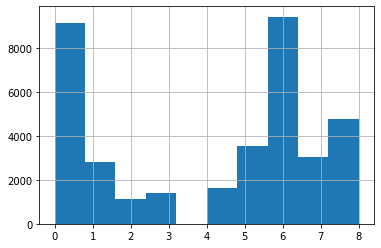

In [38]:
d=df['Activity_Y'].hist().get_figure()
d.savefig('2.jpg')

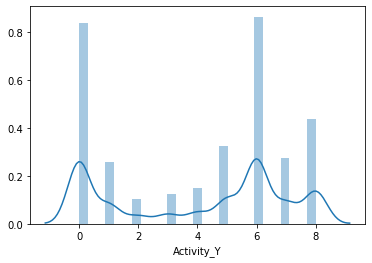

In [37]:
import seaborn as sns
sns.distplot(df['Activity_Y'], hist=True, kde=True)

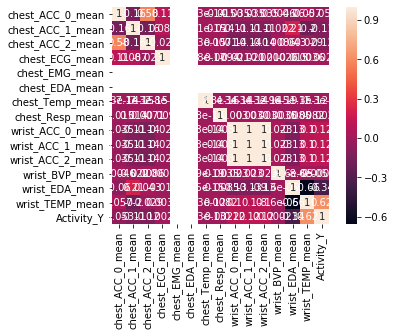

In [39]:
sns.heatmap(df.corr(), square=True, annot=True)

In [41]:
X = df.loc[:,['chest_ACC_0_mean','chest_ACC_1_mean','chest_ACC_2_mean','chest_ECG_mean','chest_EMG_mean','chest_EDA_mean','chest_Temp_mean','chest_Resp_mean','wrist_ACC_0_mean','wrist_ACC_1_mean','wrist_ACC_2_mean','wrist_BVP_mean','wrist_EDA_mean','wrist_TEMP_mean']]

In [42]:
y = df['Activity_Y']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [45]:
# RF 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [46]:
rf0 = RandomForestClassifier(oob_score=True, random_state=666)
rf0.fit(X_train,y_train)
print(rf0.oob_score_)
y_predprob = rf0.predict_proba(X_test)[:,1]
# roc can only do binary question our y_test is not binary 
# print("AUC Score (Train): %f" % roc_auc_score(y_test, y_predprob,sample_weight=None))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.934900603840152


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [52]:
param_test1 = {'n_estimators': range(10,101,10)}
gsearch1 = GridSearchCV(
    estimator=RandomForestClassifier(min_samples_split=100, min_samples_leaf=20, max_depth=10,
                                     max_features='sqrt', random_state=10),
    param_grid=param_test1, cv=5,iid=False)
scores = gsearch1.fit(X_train, y_train)
print( scores.best_params_,scores.best_score_ , scores.best_estimator_)

{'n_estimators': 80} 0.933170362926691 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)


In [50]:
from sklearn.tree import DecisionTreeClassifier
algorithm2 = DecisionTreeClassifier()
hyperparameters = {
    "max_depth"    : [5, 10,20],
    "min_samples_leaf":[5,10,20], 
    "max_features" : [5, 8, 10]
}

grid_optimization = GridSearchCV(algorithm2, 
                                     hyperparameters, 
                                     cv=5, 
                                     iid=False, )

scores = grid_optimization.fit(X_train, y_train)

scores.best_score_ , scores.best_estimator_

(0.9681122102998133,
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                        max_features=10, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=5, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'))

In [ ]:
b = [0.909426,-0.084963,-0.168792,0.114459,-1.5,0.0,-273.149688,3.395482,-0.425781,-0.425781,-0.425781,89.281250,2.674739,34.5]
final_features = [np.array(b)]

algorithme.predict(final_features)